In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력

import seaborn as sns

%matplotlib inline
# 그래프 설정 한글폰트
if os.name == 'nt': # 윈도우 사용자
    mpl.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': # 맥 사용자
    mpl.rc('font', family = 'AppleGothic')
else:
    print('check your os')

mpl.rc("axes", unicode_minus=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')
# 라이브러리
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 이상치 측정용 스케일
from sklearn.preprocessing import scale, minmax_scale , robust_scale
import matplotlib


C:\Users\user\AppData\Local\Temp/ipykernel_8296/2669561005.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/Project1/DATA'

# 1. 반도체 공정 데이터 전처리 

## 1-1. Oxidation Process
### Thickness > 700인 데이터에 대해 라벨링. 이상치 처리

In [3]:
df_oxi = pd.read_csv(f'{path}/Oxid_000.csv')
print(df_oxi.shape)
df_oxi.head(2)

(852, 13)


,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30


In [4]:
df_oxi.describe()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000


<AxesSubplot:>

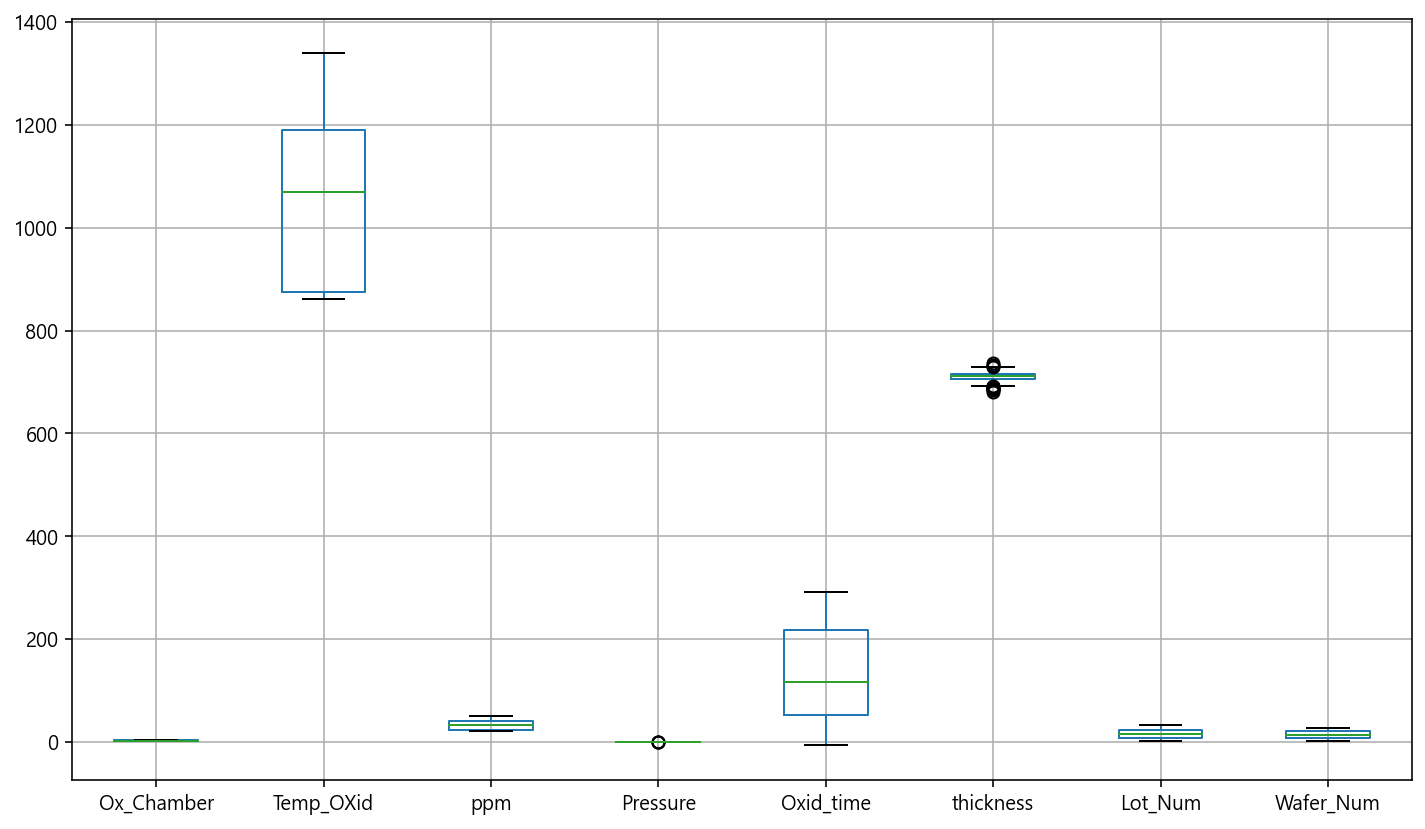

In [5]:
df_oxi.boxplot(figsize = (12, 7))

In [6]:
df_oxi_num = df_oxi.select_dtypes(exclude = 'object')
df_oxi_char = df_oxi.select_dtypes(include = 'object')

In [7]:
df_oxi_robust = robust_scale(df_oxi_num)
df_oxi_robust = pd.DataFrame(df_oxi_robust, columns = df_oxi_num.columns)
df_oxi_robust.head()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
0,-0.5,0.221805,-0.034440,-1.083333,-0.327273,-1.308716,-0.9375,-0.928571
1,-0.5,0.473718,-0.086655,-1.583333,0.127273,-1.594322,-0.9375,-0.857143
2,-0.5,-0.021540,0.338286,0.333333,0.072727,-0.659287,-0.9375,-0.785714
3,-0.5,0.144600,-0.029996,-1.000000,-0.157576,-0.088181,-0.9375,-0.714286
4,-0.5,-0.253894,0.260519,-0.750000,-0.109091,0.580101,-0.9375,-0.642857


In [8]:
df_scale_desc = df_oxi_robust.describe()
df_scale_desc.round(3)

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,852.000,852.000,852.000,852.000,852.000,852.000,852.000,852.000
mean,0.000,-0.015,-0.012,-0.135,0.044,-0.072,0.018,-0.008
std,0.406,0.476,0.472,0.756,0.462,0.871,0.570,0.556
min,-0.500,-0.659,-0.686,-2.750,-0.739,-3.249,-0.938,-0.929
25%,-0.500,-0.619,-0.609,-0.667,-0.388,-0.569,-0.500,-0.500
50%,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000
75%,0.500,0.381,0.391,0.333,0.612,0.431,0.500,0.500
max,0.500,0.859,0.916,1.333,1.061,2.781,1.000,0.929


In [9]:
df_oxi.sort_values(by = 'thickness', ascending =True)
df_oxi.head(2)

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30


### 시분위수를 활용한 이상치 제거

In [10]:
# 시분위수를 활용한 이상치 제거

def remove_outlier(data) :
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    mask = np.where((data <= upper_bound) & (data >= lower_bound), data, np.nan)
    return mask


In [11]:
continuous_ls = list(df_oxi_num.columns)

for i in continuous_ls :
    df_oxi[i].apply(remove_outlier)

In [12]:
df_oxi['Oxid_time'] = np.where(df_oxi['Oxid_time'] <= 0 , np.nan, df_oxi['Oxid_time'])

In [13]:
df_oxi['Reinforcement'] = np.where(df_oxi['thickness'] >= 700, True, False)

### 가설검정을 위한 연속형 데이터 oxi_time 셋

In [14]:
# df_oxi data 구분

cond = (df_oxi['thickness'] >= 700) 

ox_posi = df_oxi[cond]
ox_nega = df_oxi[~cond]

In [15]:
df_oxi.pivot_table(index = 'Reinforcement', values = ['Oxid_time', 'Pressure', 'Temp_OXid', 'ppm'])

,Oxid_time,Pressure,Temp_OXid,ppm
Reinforcement,,,,
False,111.448718,0.206524,1082.455629,34.090732
True,125.555411,0.211891,1062.494658,33.107623


- 차후 통계적 가설 검증을 통해, 산화막 증착 시간이 박막 두께에 대해 유의미한 차이가 있는지 확인

## 1-2. Lithography / Soft bake (Photo)
### Lithography 공정에서 LineCD 적정값을 필터링 ... 25 <= x < = 55

In [16]:
df_soft = pd.read_csv(f'{path}/Photo_Softbake_000.csv')
df_lit = pd.read_csv(f'{path}/Photo_lithography_000.csv')

In [17]:
continuous_ls = list(df_soft.select_dtypes(exclude = 'object').columns)

for i in continuous_ls :
    df_soft[i].apply(remove_outlier)

In [18]:
continuous_ls = list(df_lit.select_dtypes(exclude = 'object').columns)
for i in continuous_ls:
    df_lit[i].apply(remove_outlier)
# continuous_ls
# df_lit.head()

In [19]:
df_lit.shape

(852, 11)

In [20]:
df_lit.head(5)

,lithography_Chamber,Line_CD,Lamp,UV_type,Wavelength,Resolution,Energy_Exposure,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,30.959,Hg-Arc,H,405,516.657,109.769,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,2,29.653,Hg-Arc,H,405,501.894,107.102,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,3,28.063,Hg-Arc,I,365,506.750,110.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,31.556,Hg-Arc,I,365,537.603,107.072,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,2,31.969,Hg-Arc,I,365,560.574,108.073,NOLSM515,1,5,17-02-2019 PM 9:04:30


In [21]:
df_lit['Range_check'] = np.where((df_lit['Line_CD'] >= 25) & (df_lit['Line_CD'] <= 55), True, False)

In [22]:
df_lit.head(5)

,lithography_Chamber,Line_CD,Lamp,UV_type,Wavelength,Resolution,Energy_Exposure,No_Die,Lot_Num,Wafer_Num,Datetime,Range_check
0,1,30.959,Hg-Arc,H,405,516.657,109.769,NOLSM111,1,1,17-02-2019 PM 9:04:30,True
1,2,29.653,Hg-Arc,H,405,501.894,107.102,NOLSM212,1,2,17-02-2019 PM 9:04:30,True
2,3,28.063,Hg-Arc,I,365,506.750,110.471,NOLSM313,1,3,17-02-2019 PM 9:04:30,True
3,1,31.556,Hg-Arc,I,365,537.603,107.072,NOLSM414,1,4,17-02-2019 PM 9:04:30,True
4,2,31.969,Hg-Arc,I,365,560.574,108.073,NOLSM515,1,5,17-02-2019 PM 9:04:30,True


In [23]:
df_lit.pivot_table(index = 'Range_check', columns = 'UV_type', aggfunc = 'count', values = 'Line_CD')

UV_type,G,H,I
Range_check,,,
False,45,93,48
True,267,192,206


- 추후 통계적 가설검정을 통해 해당 공정에 대한 Out of Range 확인

## 1-3. Etching Process
  - Dry Etching, 공정 데이터에서, thinfilm 값이 150 이하로 떨어지는 값을 제거 (missing value로 대치)'
  - Thin Film 은 150nm 초과가 되어야 다음 공정이 가능함

In [24]:
df_etch = pd.read_csv(f'{path}/Etching_000.csv')

In [25]:
continuous_ls = list(df_etch.select_dtypes(exclude = 'object').columns)

for i in continuous_ls :
    df_etch[i].apply(remove_outlier)

In [26]:
for i in range(1, 5) :
    df_etch[f'Thin Film {i}'] = np.where(df_etch[f'Thin Film {i}'] <= 150, np.nan, df_etch[f'Thin Film {i}'])

In [27]:
df_etch.isnull().sum()

Unnamed: 0          0
Etching_Chamber     0
Process 3           0
Temp_Etching        0
Source_Power        0
Selectivity         0
No_Die              0
Lot_Num             0
Wafer_Num           0
Datetime            0
Thin Film 4        84
Thin Film 3        48
Thin Film 2        16
Thin Film 1         7
dtype: int64

### Etching Rate ( 엣칭 속도)
 = thin1 - thin4 / 30

In [28]:
df_etch['Etching_rate'] = (df_etch['Thin Film 1'].round(3) - df_etch['Thin Film 4'].round(3)) / 30

In [29]:
df_etch.head(2)

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching_rate
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38,3.679333
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11,3.637000


- 추후 ER 값이 품질 수준에 영향을 미치는지 확인

## 1-4. Implantation Process (Dopant) 
- Wafer위에 전기적 특성을 부여하는 단계, Dopat 주입 단계
- 공정 데이터에서, 음수 값으로 측정되는 이상치를 제거

In [30]:
df_imp = pd.read_csv(f'{path}/Implant_000.csv')
df_imp.head(5)

,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Current,Temp_implantation,Furance_Temp,RTA_Temp,No_Die,Lot_Num,Wafer_Num,Datetime
0,3,Implantation,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,0.01,102.847,885.0,154,NOLSM111,1,1,17-02-2019 ?? 9:04:30
1,2,Implantation,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,0.01,104.323,919.0,154,NOLSM212,1,2,17-02-2019 ?? 9:04:30
2,1,Implantation,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17,32162.414,0.01,100.605,916.0,155,NOLSM313,1,3,17-02-2019 ?? 9:04:30
3,1,Implantation,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17,32874.925,0.01,101.739,911.0,156,NOLSM414,1,4,17-02-2019 ?? 9:04:30
4,2,Implantation,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17,30985.928,0.01,106.422,872.0,155,NOLSM515,1,5,17-02-2019 ?? 9:04:30


In [31]:
continuous_ls = list(df_imp.select_dtypes(exclude = 'object').columns)

for i in continuous_ls :
    df_imp[i].apply(remove_outlier)

In [32]:
df_imp_num = df_imp.select_dtypes(exclude = 'object')
df_imp_num.describe()
np.where(df_imp_num['Flux60s'].isnull())[0]

array([702], dtype=int64)

In [33]:
df_imp['Flux160s'] = np.where(df_imp['Flux160s']<0, np.NaN, df_imp['Flux160s'])
df_imp['Flux90s'] = np.where(df_imp['Flux90s']<0, np.NaN, df_imp['Flux90s'])

<AxesSubplot:>

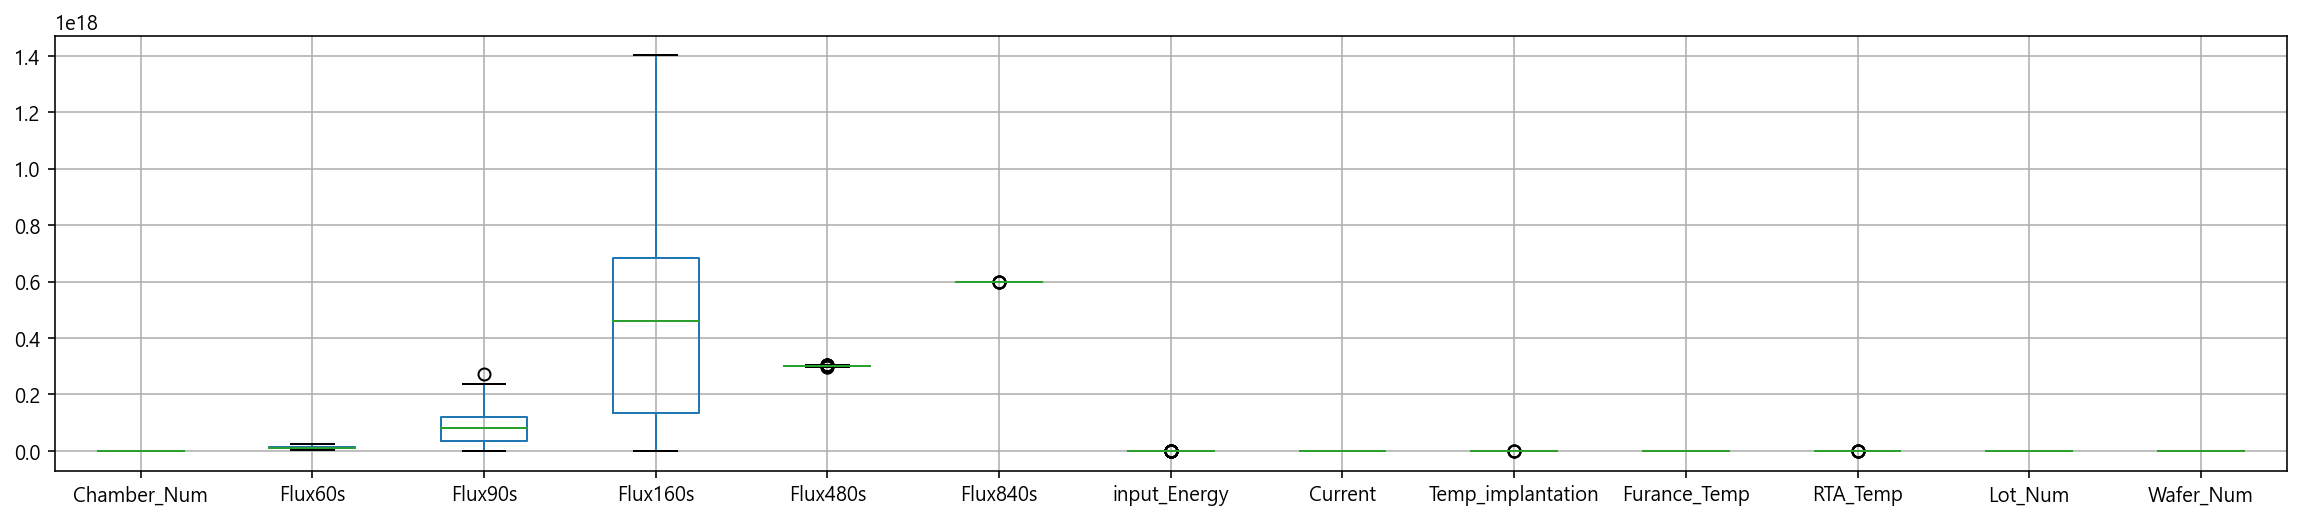

In [34]:
plt.figure(figsize = (20 , 4))
df_imp.boxplot()

In [35]:
df_imp.describe()

,Chamber_Num,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Current,Temp_implantation,Furance_Temp,RTA_Temp,Lot_Num,Wafer_Num
count,852.000000,8.510000e+02,8.430000e+02,8.470000e+02,8.520000e+02,8.520000e+02,852.000000,8.520000e+02,852.000000,851.000000,852.000000,852.000000,852.000000
mean,1.967136,1.186913e+16,8.078787e+16,4.507138e+17,3.002006e+17,5.999997e+17,32007.862815,1.000000e-02,103.161261,901.128085,154.696009,16.281690,13.894366
std,0.830584,4.603012e+15,5.414101e+16,3.312478e+17,1.145362e+15,1.080690e+12,588.322496,1.614240e-16,1.654830,18.487803,2.420114,9.116841,7.785951
min,1.000000,1.967326e+15,3.846247e+09,4.394693e+00,2.963401e+17,5.999965e+17,29604.262000,1.000000e-02,97.744000,854.000000,148.000000,1.000000,1.000000
25%,1.000000,8.590656e+15,3.409473e+16,1.345960e+17,2.994309e+17,5.999990e+17,31640.161000,1.000000e-02,102.063500,890.000000,153.000000,8.000000,7.000000
50%,2.000000,1.177267e+16,8.179143e+16,4.592458e+17,3.001862e+17,5.999997e+17,32200.488500,1.000000e-02,103.295500,904.000000,155.000000,16.000000,14.000000
75%,3.000000,1.516101e+16,1.213181e+17,6.836788e+17,3.009426e+17,6.000004e+17,32420.668750,1.000000e-02,104.322000,915.000000,156.000000,24.000000,21.000000
max,3.000000,2.403938e+16,2.720974e+17,1.401808e+18,3.036145e+17,6.000025e+17,33675.551000,1.000000e-02,107.376000,944.000000,162.000000,32.000000,27.000000


## 1-5. Inspection (검사 단계)
- 품질 검사에서 발생한 Error 처리 Error 유무를 새로운 이산형 변수로 생성

In [36]:
df_ins = pd.read_csv(f'{path}/Inspect_000.csv')

In [37]:
continuous_ls = list(df_ins.select_dtypes(exclude = 'object').columns)

for i in continuous_ls :
    df_ins[i].apply(remove_outlier)

In [38]:
df_ins['target_binom'] = np.where(df_ins['Error_message'] == 'none' , 0, 1)

In [39]:
df_ins['target_binom'].value_counts()

0    786
1     66
Name: target_binom, dtype: int64

## 1-6. 종합 데이터 병합

In [40]:
df1= df_oxi.merge(df_soft, how = 'left', on = 'No_Die')
df1 = df1.merge(df_lit, how = 'left', on = 'No_Die')
df1 = df1.merge(df_etch, how = 'left', on = 'No_Die')
df1 = df1.merge(df_imp, how = 'left', on = 'No_Die')
df1 = df1.merge(df_ins, how = 'left', on = 'No_Die')

print(df1.shape)
df1.T.head(5)

(852, 79)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851
Ox_Chamber,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,...,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,1,1,1,1
process,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,...,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation
type,dry,dry,dry,dry,dry,wet,wet,dry,dry,dry,dry,dry,dry,dry,dry,wet,dry,dry,wet,dry,dry,dry,dry,wet,wet,wet,dry,dry,dry,dry,wet,dry,dry,dry,dry,dry,wet,dry,wet,dry,dry,dry,wet,wet,dry,dry,wet,dry,dry,dry,...,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet
Temp_OXid,1138.979159,1218.184551,1062.467808,1114.704773,989.411946,979.109703,1136.114954,1096.241849,1042.243992,1104.836285,1077.751749,1113.712029,1193.96599,1098.177968,1013.703486,1102.425583,1100.646875,996.162641,1017.293112,1037.438376,1000.063674,1080.085993,1068.506643,1067.237334,1035.356914,1104.129739,956.156908,1058.827973,1240.289547,1097.008332,1133.01699,1023.121162,1101.396388,1159.860168,1041.009606,1131.774318,1011.580452,1096.890728,910.964121,1167.0116,1031.064061,1180.339485,1030.763662,1154.106984,984.809739,1141.708438,1183.72364,1226.02363,1189.47041,1080.213522,...,1272.531274,1275.425012,1271.349047,1271.710804,1275.014592,1263.230499,1280.077304,1279.385851,1276.974453,1267.803024,1276.382926,1274.433432,1268.359218,1278.176491,1276.231363,1268.724821,1280.516618,1273.845898,1271.441974,1273.849873,1270.70902,1271.740548,1266.660904,1272.978539,1271.129546,1268.575074,1282.30307,1270.202154,1272.842125,1267.846723,1275.752707,1273.413729,1273.038761,1280.10712,1270.900465,1275.889228,1273.139166,1279.045765,1275.605503,1274.027776,1269.454003,1273.698908,1272.216734,1280.687973,1275.153349,1275.182502,1268.105427,1279.160563,1272.804948,1278.097085
Vapor,O2,O2,O2,O2,O2,H2O,H2O,O2,O2,O2,O2,O2,O2,O2,O2,H2O,O2,O2,H2O,O2,O2,O2,O2,H2O,H2O,H2O,O2,O2,O2,O2,H2O,O2,O2,O2,O2,O2,H2O,O2,H2O,O2,O2,O2,H2O,H2O,O2,O2,H2O,O2,O2,O2,...,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O


## 1-7. 데이터 결측치 제거 및 저장
- 제거하지 않은 데이터 : df1
- 제거한 데이터 : df2

In [41]:
df2 = df1.dropna().copy()

In [42]:
df2.isnull().sum().head(5)

df2.shape

(752, 79)

### 불필요한 공정 변수 제거 후, 데이터 파일로 저장

In [43]:
df2['Chamber_route'] = 'route_' + df2['Ox_Chamber'].apply(str) + df2['photo_soft_Chamber'].apply(str) + df2['lithography_Chamber'].apply(str) + df2['Etching_Chamber'].apply(str) + df2['Chamber_Num'].apply(str)

In [44]:
#df3 = df2.loc[:,~df2.columns.duplicated()]
df3 = df2.drop(columns = ['Lot_Num_x', 'Wafer_Num_x', 'Datetime_x', 'Lot_Num_y', 'Wafer_Num_y', 'Datetime_y', 'Lamp', 'Wafer_map', 'Current', 'Unnamed: 0_y', 'Unnamed: 0_x'])

In [45]:
df3.shape

(752, 57)

In [46]:
df3.to_csv(f'{path}/processing_data.csv')

# 2. 데이터 시각화 및 가설 검정 실시

[추가로 생각해볼 문제]
1. Dry와  Wet데이터를 나눠서 Oxidation Time에 따른 보강여부의 유의미한 차이가 있는지 검정 
2. Oxidation Type과 UV Type에 따라서 Etching rate와 Target의 Corr값이 어떻게 변화하는지 확인

## 2-0. Dry와 Wet 데이터를 나눠서 Oxidation Time에 따른 보강여부의 유의미한 차이가 있는지 검정

In [175]:
df_dry = df3[df3['type'] == 'dry']
df_wet =  df3[df3['type'] == 'wet']

<AxesSubplot:xlabel='Oxid_time', ylabel='Count'>

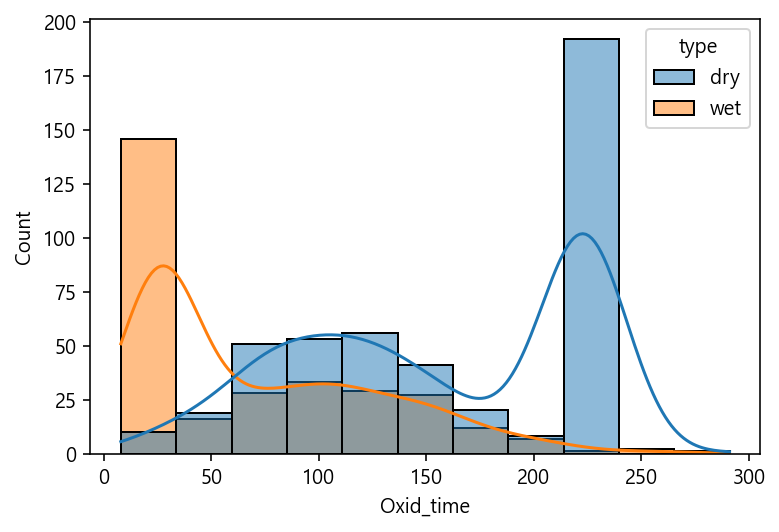

In [176]:
sns.histplot(data = df3, x = 'Oxid_time', hue = 'type', kde = True)

In [177]:
# Dry 데이터의 경우 정규분포를 따르는지 확인
# 귀무가설 : dry데이터는 정규분포를 따를 것이다.
# 대립가설 : dry데이터는 정규분포를 따르지 않을 것이다.

In [178]:
dry = stats.normaltest(df_dry['Oxid_time'])
wet = stats.normaltest(df_wet['Oxid_time'])

In [179]:
print(dry, '\n', wet)

NormaltestResult(statistic=946.9620964779172, pvalue=2.3431142434567153e-206) 
 NormaltestResult(statistic=33.105865470975104, pvalue=6.473701250961205e-08)


In [180]:
## p-value < 0.05를 만족하므로 귀무가설을 기각, 두 분포는 정규분포를 따르지 않는다.

In [181]:
#dry data에 대한 가설검증
cond = (df_dry['thickness'] >= 700) 

oxd_posi = df_dry[cond]
oxd_nega = df_dry[~cond]

In [182]:
#wet data에 대한 가설검증
cond = (df_wet['thickness'] >= 700) 

oxw_posi = df_wet[cond]
oxw_nega = df_wet[~cond]

In [183]:

# true - false => 범주형 데이터
# 연속형 데이터 두개를 비교
# 귀무가설 : dry, wet은 보강여부에 따라 
dry = stats.ranksums(oxd_posi["Oxid_time"], oxd_nega["Oxid_time"])
wet =stats.ranksums(oxw_posi["Oxid_time"], oxw_nega["Oxid_time"])
# p-value < 0.05를 가지므로 dry와 wet의 Oxid_time은 정규분포를 갖는다.
print(dry, '\n', wet)

RanksumsResult(statistic=5.008678548753455, pvalue=5.480501884398469e-07) 
 RanksumsResult(statistic=-3.661049377606003, pvalue=0.00025118433897645465)


In [186]:
dry = stats.levene(oxd_posi["Oxid_time"], oxd_nega["Oxid_time"])
wet =  stats.levene(oxw_posi["Oxid_time"], oxw_nega["Oxid_time"])

print(dry, '\n', wet) 
#

LeveneResult(statistic=24.71155987263402, pvalue=9.490312563905255e-07) 
 LeveneResult(statistic=0.24479728891300553, pvalue=0.6211258824017245)


In [187]:
# 주어진 자료가 비정규분포이고, 등분산이 아니기때문에 two sample T test를 실시한다.
# 귀무가설 : 보강 여부에 따라서 Oxidation time은 유의미한 차이를 갖는다.
# 대립가설 : 차이를 갖지 않는다,

#  정규성 검정
x = stats.shapiro(oxd_posi["Oxid_time"])
print("Shapiro-Wlikis 검정 통계량은 %.3f, p - value는 %.3f" %x)

y = stats.shapiro(oxd_nega["Oxid_time"])
print("Shapiro-Wlikis 검정 통계량은 %.3f, p - value는 %.3f" %y)

# 비정규성 검정
stat, p = stats.bartlett(oxd_posi["Oxid_time"], oxd_nega["Oxid_time"])
print('등분산 검정결과 p-value 는 %.3f' %p)

# 2-sample test
t_result = stats.ttest_ind(oxd_posi["Oxid_time"], oxd_nega["Oxid_time"], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample Test")
print(t, p)

stats.ttest_ind(oxd_nega["Oxid_time"], oxd_posi["Oxid_time"], equal_var = True)

Shapiro-Wlikis 검정 통계량은 0.853, p - value는 0.000
Shapiro-Wlikis 검정 통계량은 0.914, p - value는 0.003
등분산 검정결과 p-value 는 0.006
2-Sample Test
5.098 0.0


Ttest_indResult(statistic=-5.097989153709208, pvalue=5.069617004101532e-07)

In [188]:
# 주어진 자료가 비정규분포이고, 등분산이 아니기때문에 two sample T test를 실시한다.
# 귀무가설 : 보강 여부에 따라서 Oxidation time은 유의미한 차이를 갖는다.
# 대립가설 : 차이를 갖지 않는다,

#  정규성 검정
x = stats.shapiro(oxw_posi["Oxid_time"])
print("Shapiro-Wlikis 검정 통계량은 %.3f, p - value는 %.3f" %x)

y = stats.shapiro(oxw_nega["Oxid_time"])
print("Shapiro-Wlikis 검정 통계량은 %.3f, p - value는 %.3f" %y)

# 비정규성 검정
stat, p = stats.bartlett(oxw_posi["Oxid_time"], oxw_nega["Oxid_time"])
print('등분산 검정결과 p-value 는 %.3f' %p)

# 2-sample test
t_result = stats.ttest_ind(oxw_posi["Oxid_time"], oxw_nega["Oxid_time"], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample Test")
print(t, p)

stats.ttest_ind(oxw_nega["Oxid_time"], oxw_posi["Oxid_time"], equal_var = True)

Shapiro-Wlikis 검정 통계량은 0.829, p - value는 0.000
Shapiro-Wlikis 검정 통계량은 0.951, p - value는 0.247
등분산 검정결과 p-value 는 0.912
2-Sample Test
-4.045 0.0


Ttest_indResult(statistic=4.044702479433558, pvalue=6.67345147431477e-05)

In [189]:
# 2-sample T- test 결과, dry, wet 데이터 모두 pvalue < 0.05로 귀무가설을 기각한다. 대립가설을 채택하여 
# dry, wet으로 구분했을 때 , Oxidation 과정의 보강여부에 유의미한 차이가 없다는 결론을 내린다.

## 2-1. Oxidation 과정의 보강여부에 따른 , Oxidation Time의 유의미한 차이 확인(Bar Plot / T Test)

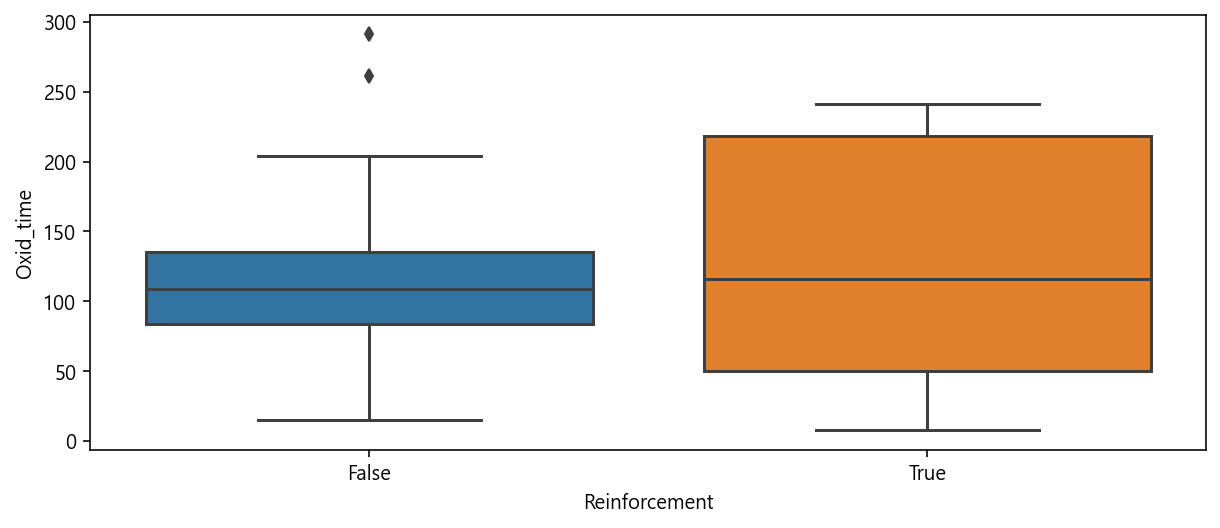

In [47]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df3, x = 'Reinforcement', y = 'Oxid_time')
plt.show()

### Oxidation 과정 내 가설 검정 실시

- Oxidation 과정의 보강여부에 따른, Oxidation Time의 유의미한 차이 확인 
- 15번은 반대로 생각해야함, Oxidation Time을 증가시킴에 따른 oxidation 과정이 보강여부가 낫지않니
- 통계적 가설검정 가설 수립
- 귀무 가설 : Oxidation 과정 보강여부에도 Oxidation Time의 차이가 없다.
- 대립 가설 : Oxidation 과정 보강여부에도 Oxidation Time의 차이가 있다.

-- 분석 절차
1. Oxidation Time의 정규성 검정 실시
    - 정규 분포를 따를 시, 등분산 여부 확인
    - 비정규 분포를 따를 시, 이상치 제거 또는 비모수적 검정실시
2. 보강여부(Reinforcement에 따른 등분산성 검정 실시) 

### 2-1-1. Oxidataion Time 의 정규성 검정 실시
- 귀무가설 / 대립가설 수립
- 히스토그램 확인
- p.value 계산 및 결론 도출 (Normal Test)

In [48]:
# 통계모델 import
## t 분포는 자유도라는 모수에 의해 그 모양이 결정됨, 여기서 degree of freedom = 샘플 크기 - 1 , 꼬리부분이 더평평한 정규분포와 비슷, 표본 크기가 적을
##수록 더적어짐
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

<AxesSubplot:xlabel='Oxid_time', ylabel='Count'>

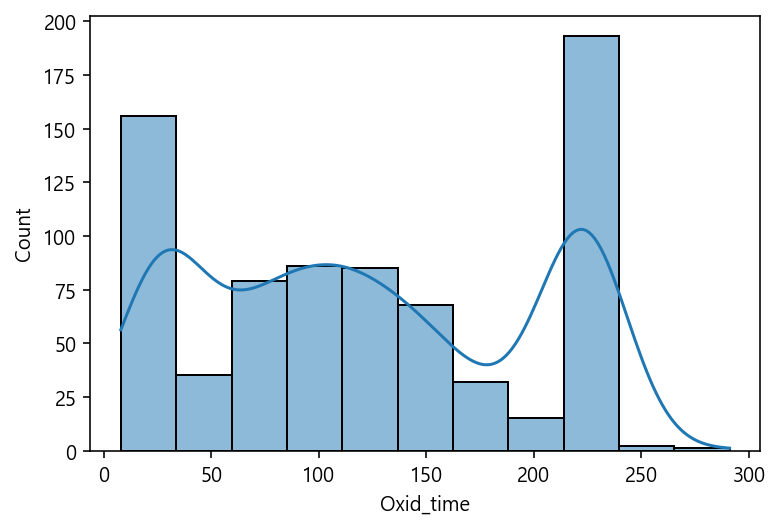

In [49]:
#df3 = pd.read_csv(f'{path}/processing_data.csv')

sns.histplot(df3, x = 'Oxid_time', kde = True) 
# 히스토그램 확인결과, 정규분포를 따르지 않기 때문에 normaltest 검정에서 p-value < a일 것으로 예상.

In [196]:
# t_test가 적용 가능한지 알아보기 위한 shapiro 확인
# 카이제곱 독립성 검정.. normaltest에서 p-value는 chi의 제곱값
# 첨도(k) 는 얼마나 뾰족한지에 대한 통계량, 왜도는 분포모양의 비대칭도를 나타냄.
# 귀무가설은 : 정규분포를 따를 것이다.
# 대립가설은 정규분포를 따르지 않을 것이다. p < 0
x = stats.normaltest(df3['Oxid_time'])
print("The NormalTest Statistics is %.3f and p-values is %.f" %x)
stats.describe(x)
# x가 정규 분포에서 나왔다는 귀무 가설을 고려하면 p- 값은 크거나 큰 카이 제곱 통계량을 볼 확률을 나타냅니다.
# normaltest 결과, 검정통계량은 7323, p-value는 0으로
# a = 0.05 보다 작기때문에 귀무가설을 기각한다. 비정규분포를 가진다.

The NormalTest Statistics is 7323.699 and p-values is 0


DescribeResult(nobs=2, minmax=(0.0, 7323.6988862575145), mean=3661.8494431287572, variance=26818282.688284777, skewness=0.0, kurtosis=-2.0)

### 2-1-2. Oxidation Time의 보강여부에 따른 비모수 검정 실시
- Oxidation Time이 비정규분포임을 가정한다.

In [51]:
cond = (df3['thickness'] >= 700) 

ox_posi = df3[cond]
ox_nega = df3[~cond]

In [52]:

# true - false => 범주형 데이터
# 연속형 데이터 두개를 비교
stats.ranksums(ox_posi["Oxid_time"], ox_nega["Oxid_time"])

RanksumsResult(statistic=0.972244747533458, pvalue=0.3309288040213433)

- 비모수 검정 결과, pvalue = 0.33 > a 이므로, 귀무가설을 채택함. 즉, Oxid_time은 비정규성분포를 따른다

### 2-1-3. 보강여부에 따른 Oxidation Time의 등분산 검정 실시

In [53]:
x = stats.levene(ox_posi["Oxid_time"], ox_nega["Oxid_time"])
x

# 귀무가설 : 비정규분포인 Oxid_time이 등분산일 것이다.
# 대립가설 : 등분산이 아닐것이다.

LeveneResult(statistic=47.69012108299392, pvalue=1.0652700640276508e-11)

- Levenue 통계 측정 결과,  p-value가 1.06e-11 < 0.05 이므로, 귀무가설을 기각한다. 즉, 주어진 데이터는 등분산이 아니다.

### 2-1-4. 보강여부에 따른 Oxidation Time의 이분산 가정 Two Sample T test 실시

In [54]:
# 주어진 자료가 비정규분포이고, 등분산이 아니기때문에 two sample T test를 실시한다.
# 귀무가설 : 보강 여부에 따라서 Oxidation time은 유의미한 차이를 갖는다.
# 대립가설 : 차이를 갖지 않는다,

#  정규성 검정
x = stats.shapiro(ox_posi["Oxid_time"])
print("Shapiro-Wlikis 검정 통계량은 %.3f, p - value는 %.3f" %x)

y = stats.shapiro(ox_nega["Oxid_time"])
print("Shapiro-Wlikis 검정 통계량은 %.3f, p - value는 %.3f" %y)

# 비정규성 검정
stat, p = stats.bartlett(ox_posi["Oxid_time"], ox_nega["Oxid_time"])
print('등분산 검정결과 p-value 는 %.3f' %p)

# 2-sample test
t_result = stats.ttest_ind(ox_posi["Oxid_time"], ox_nega["Oxid_time"], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample Test")
print(t, p)

stats.ttest_ind(ox_nega["Oxid_time"], ox_posi["Oxid_time"], equal_var = True)

Shapiro-Wlikis 검정 통계량은 0.887, p - value는 0.000
Shapiro-Wlikis 검정 통계량은 0.944, p - value는 0.003
등분산 검정결과 p-value 는 0.000
2-Sample Test
1.351 0.177


Ttest_indResult(statistic=-1.3509130693778795, pvalue=0.17713068588786107)

In [55]:
# T_test의 결과 , pvalue > 0.05 이므로, Oxidation Time은 이분산을 가진다고 할 수 있다.
# 결론적으로, Reinforcement 보강여부에 따라서 Oxidation Time는 유의미한 차이를 갖는다. (귀무가설을 채택)
# 즉, thinfilm의 박막 두께 700nm에 따라서 Oxidation Time은 차이를 갖는다.

In [56]:
print(ox_posi["Oxid_time"].mean(), ox_nega["Oxid_time"].mean())

124.60058737151247 112.04225352112677


## 2-2. UV type에 따른 Out of range의 유의미한 차이 확인 (Chi Square Test)
- 기무가설 : UV type에 따라서 Out of range가 유의미한 차이를 가지지 않을 것이다.
- 대립가설 : UV type에 따라서 Out of range가 유의미한 차이를 가질 것이다. -> 어떤 레이저파장을 쏘느냐에 따라서 LineCD 공정이 제대로이루어 지지 않을 수 있다.

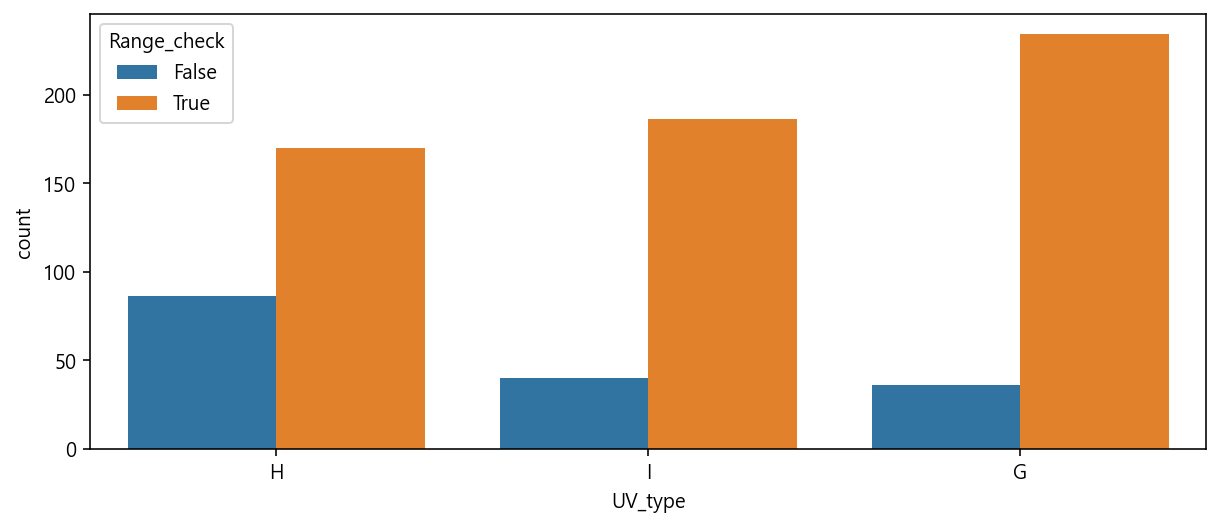

In [57]:
plt.figure(figsize = (10, 4))
sns.countplot(data = df3, x = 'UV_type', hue = 'Range_check')
plt.show()

Line
Critical Dimension nm
L i t h o g r a p h yy의결과로그려진W a f e rr의L i n e P a tt e r n 간거리
적정n mm는2 5 5 5 n mm사이

lithography
Exposure Laser UV타입(G line H line I line)

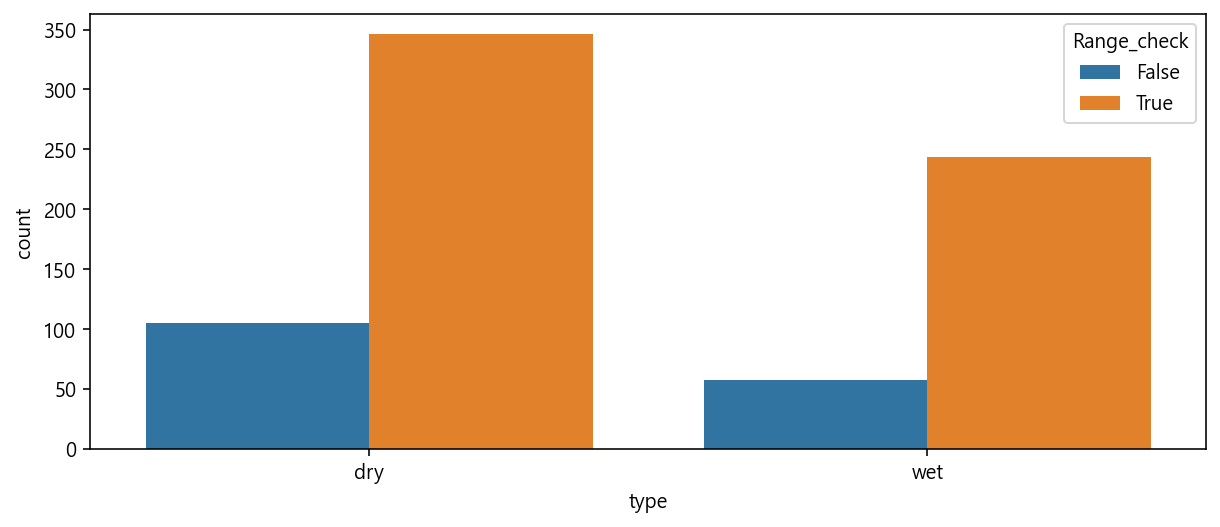

In [190]:
plt.figure(figsize = (10, 4))
sns.countplot(data = df3, x = 'type', hue = 'Range_check')
plt.show()

In [192]:
Contengency_table = pd.crosstab(df3['type'], df3['Range_check'])

Contengency_table

Range_check,False,True
type,,
dry,105,346
wet,57,244


- 기무가설 : 공정 type에 따라서 Out of range가 유의미한 차이를 가지지 않을 것이다.
- 대립가설 : 공정 type에 따라서 Out of range가 유의미한 차이를 가질 것이다. -> 어떤 레이저파장을 쏘느냐에 따라서 LineCD 공정이 제대로이루어 지지 않을 수 있다.

In [194]:
chi, pval, dof, expected = stats.chi2_contingency(Contengency_table)

print("chi-square test")
print('chisq {0:0.3f}'.format(chi))
print('p: {0:0.25f}'.format(pval))
print("degree pf freedom : {}".format(dof))
print("expected value: \n {}".format(expected.round(3)))

#p-value > 0.05의 값을 가지므로 귀무가설을 채택,  공정 타입에 대해서 Out of range는 유의미한 차이를 갖지 않을 것이다.

chi-square test
chisq 1.767
p: 0.1837214719306762278350220
degree pf freedom : 1
expected value: 
 [[ 97.157 353.843]
 [ 64.843 236.157]]


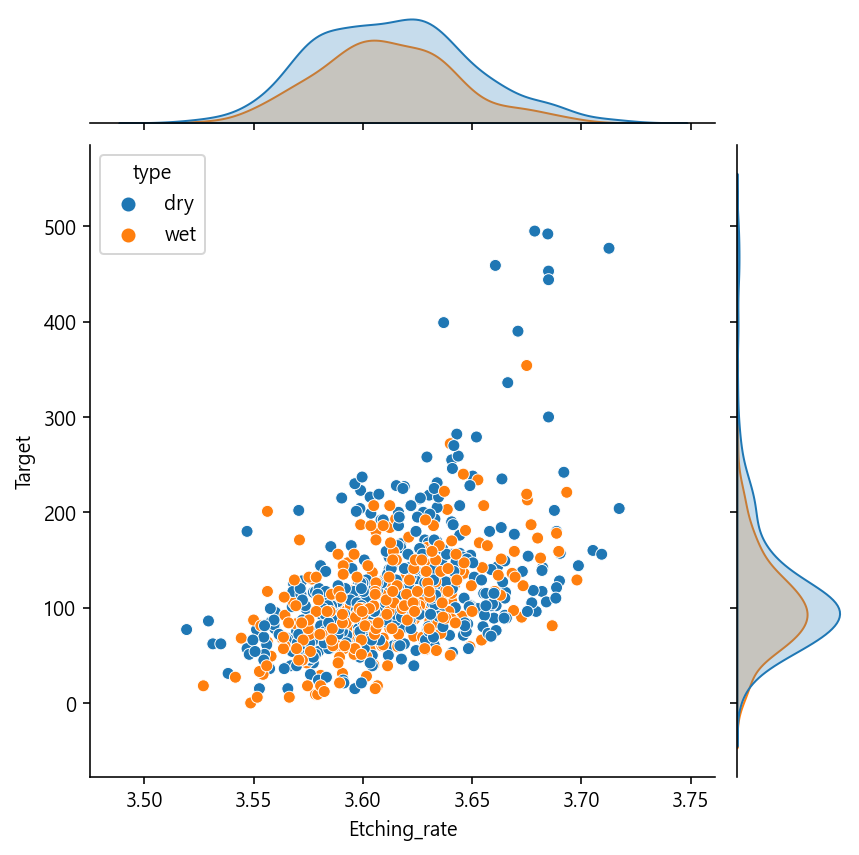

In [195]:
sns.jointplot(data = df3, x = 'Etching_rate', y = 'Target', hue ='type')

### 2-2-1. 분석절차 - Contingency Table 계산

In [58]:
Contengency_table = pd.crosstab(df3['UV_type'], df3['Range_check'])

Contengency_table

Range_check,False,True
UV_type,,
G,36,234
H,86,170
I,40,186


### 2-2-2. 분석절차 - Chi Square Test 계산

- 기무가설 : UV type에 따라서 Out of range가 유의미한 차이를 가지지 않을 것이다.
- 대립가설 : UV type에 따라서 Out of range가 유의미한 차이를 가질 것이다. -> 어떤 레이저파장을 쏘느냐에 따라서 LineCD 공정이 제대로이루어 지지 않을 수 있다.

In [59]:
chi, pval, dof, expected = stats.chi2_contingency(Contengency_table)

print("chi-square test")
print('chisq {0:0.3f}'.format(chi))
print('p: {0:0.25f}'.format(pval))
print("degree pf freedom : {}".format(dof))
print("expected value: \n {}".format(expected.round(3)))

chi-square test
chisq 34.738
p: 0.0000000286237875071343191
degree pf freedom : 2
expected value: 
 [[ 58.165 211.835]
 [ 55.149 200.851]
 [ 48.686 177.314]]


In [60]:
# 카이제곱 검정결과, p-value = 0.28e-08 < 0.05의 결과를 가지므로 귀무가설을 기각하고 대립가설을 채택한다.
# 즉, UV_Type에 따라서 Out Of Range는 유의미한 차이를 갖는다.

## 2-3 Etching Rate와 Target의 상관성 확인 (Correlation)

In [61]:
df_rate = df3[['Etching_rate', 'Target']]
df_rate.corr(method = 'pearson')

## 양의 상관관계를 갖는다.

,Etching_rate,Target
Etching_rate,1.000000,0.498164
Target,0.498164,1.000000


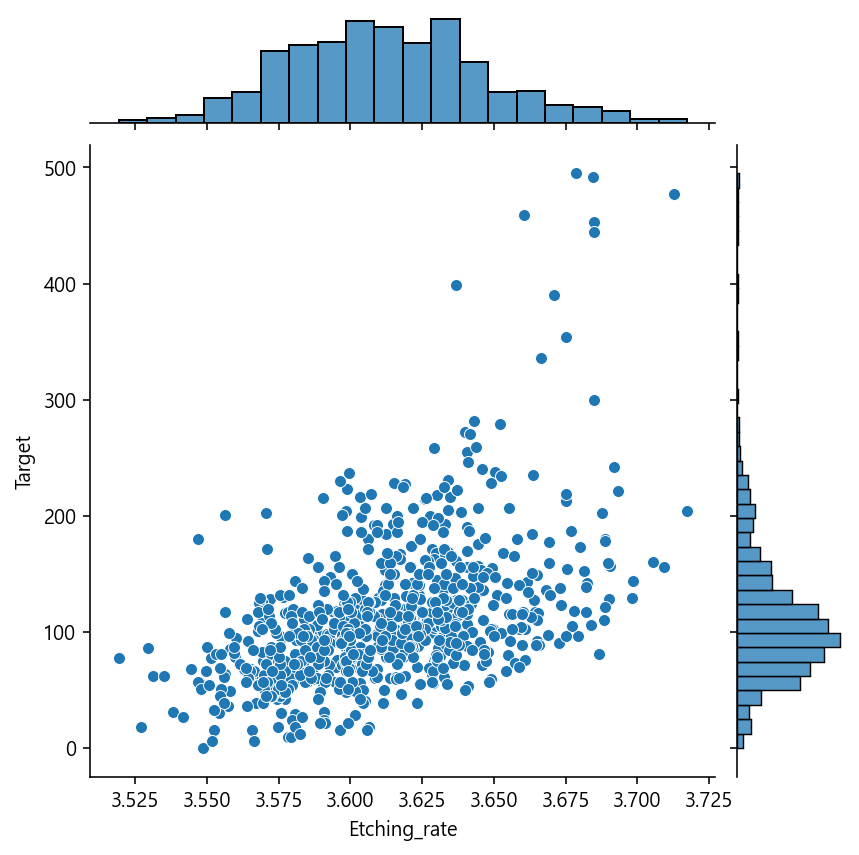

In [62]:
sns.jointplot(data = df3, x = 'Etching_rate', y = 'Target')

## 2-4. 공정 경로 별 Wafer 생산량 계산 (Pivoting)

In [63]:
a, b = df3['Chamber_route'].value_counts().index, df3['Chamber_route'].value_counts().values
dic = {
    'Chamber_route' : a,
    'count' : b
}
Chamer_route_count = pd.DataFrame(dic)

In [64]:
Chamber_route_count = Chamer_route_count.sort_values(by = 'Chamber_route')
Chamber_route_count.reset_index(drop = True, inplace = True)
Chamber_route_count.head()

,Chamber_route,count
0,route_11111,15
1,route_11133,13
2,route_11222,25
3,route_11311,17
4,route_11333,14


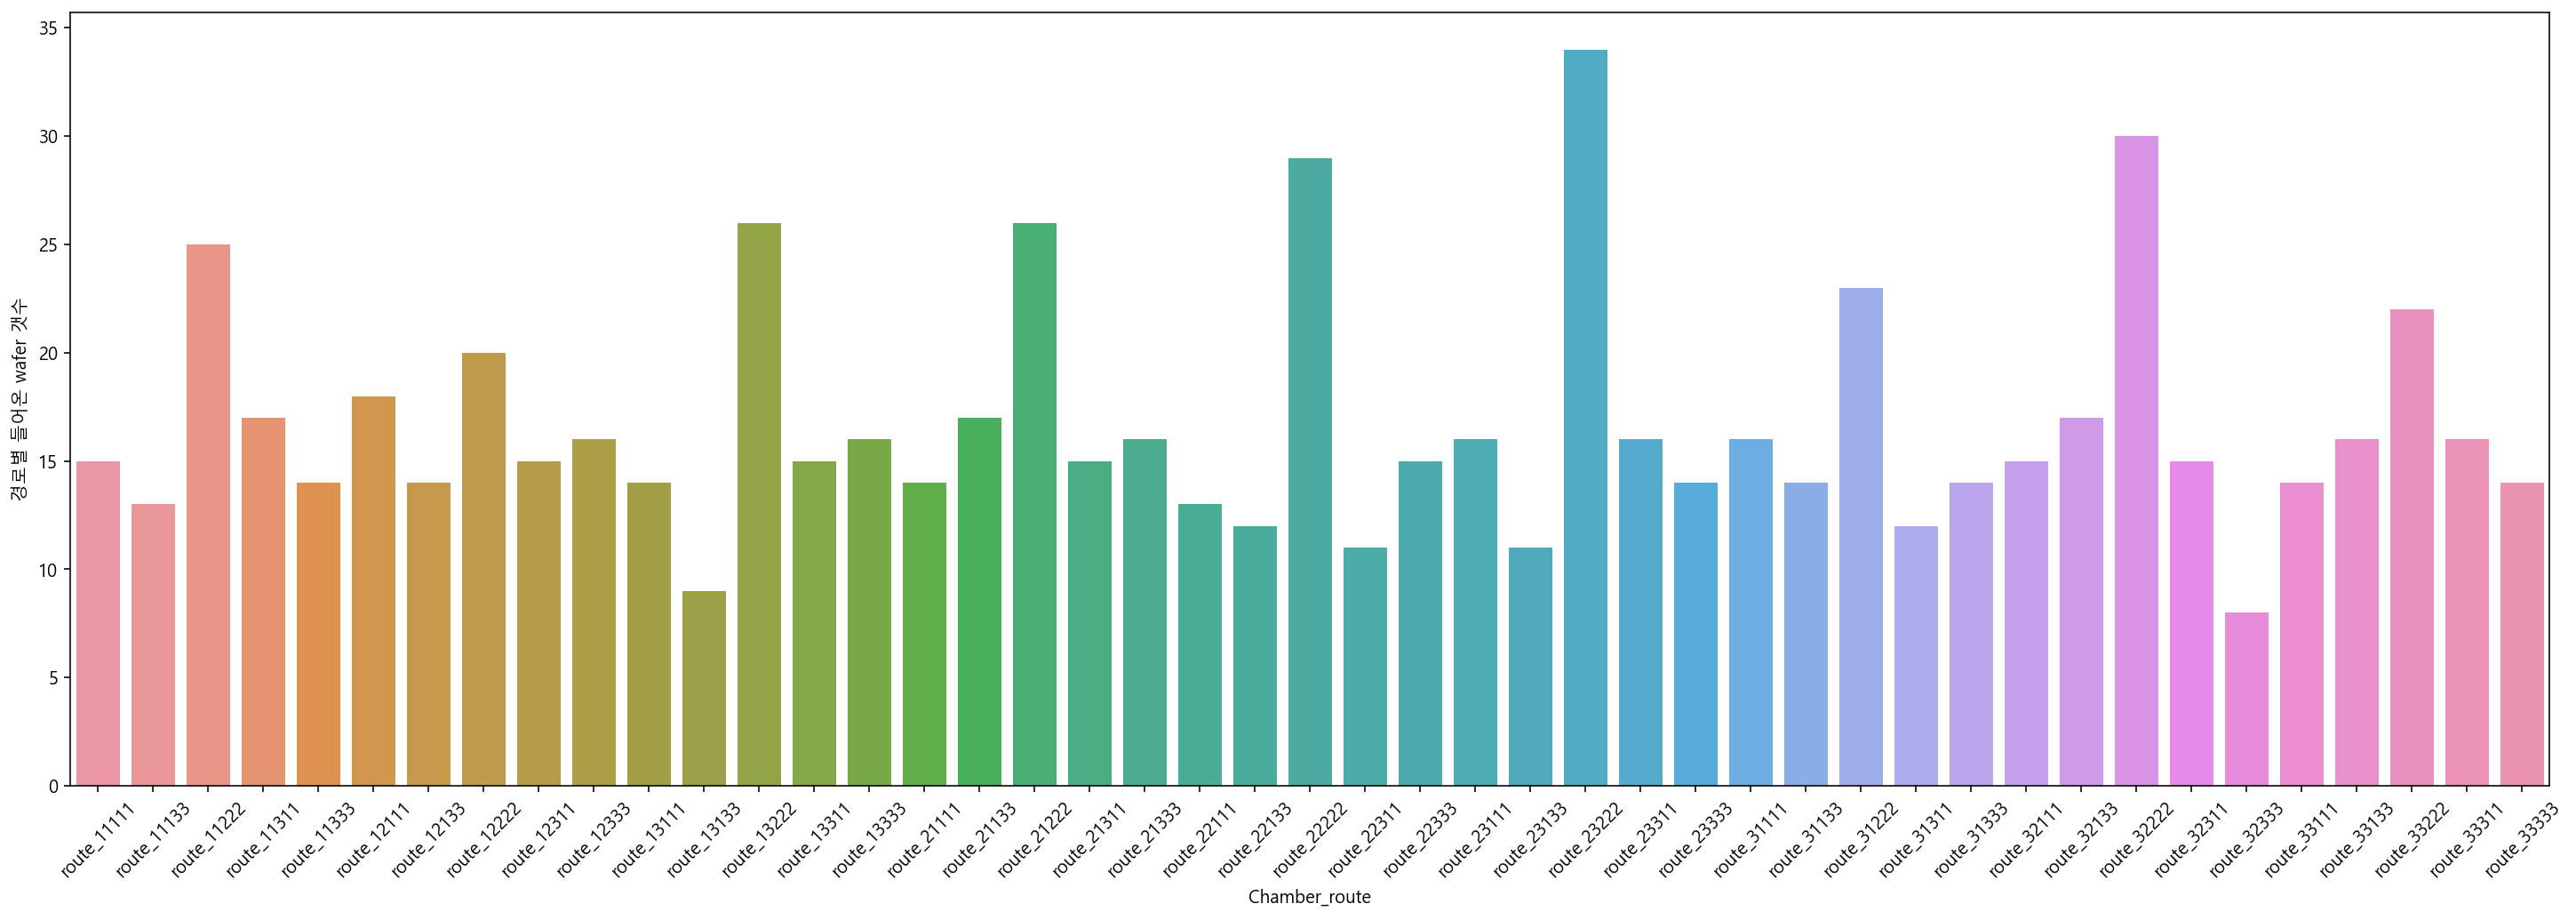

In [65]:
plt.figure(figsize = (25 , 8))
sns.countplot(data = df3.sort_values(by = 'Chamber_route', ascending=True), x = 'Chamber_route')
plt.ylabel('경로별 들어온 wafer 갯수')
plt.xticks(rotation = 45)
plt.show()

In [66]:
# 공정 경로 별 Wafer 내 불량 Chip 개수 계산
Chamber_route_error = df3.pivot_table(index = 'Chamber_route', values = 'Target', aggfunc = 'sum').reset_index()

In [67]:
Chamber_route_error.sort_values(by = 'Target', ascending = False).head(10)

Chamber_route_error

,Chamber_route,Target
0,route_11111,1415
1,route_11133,1367
2,route_11222,2281
3,route_11311,1811
4,route_11333,1203
5,route_12111,1677
6,route_12133,1519
7,route_12222,2835
8,route_12311,1253
9,route_12333,2152


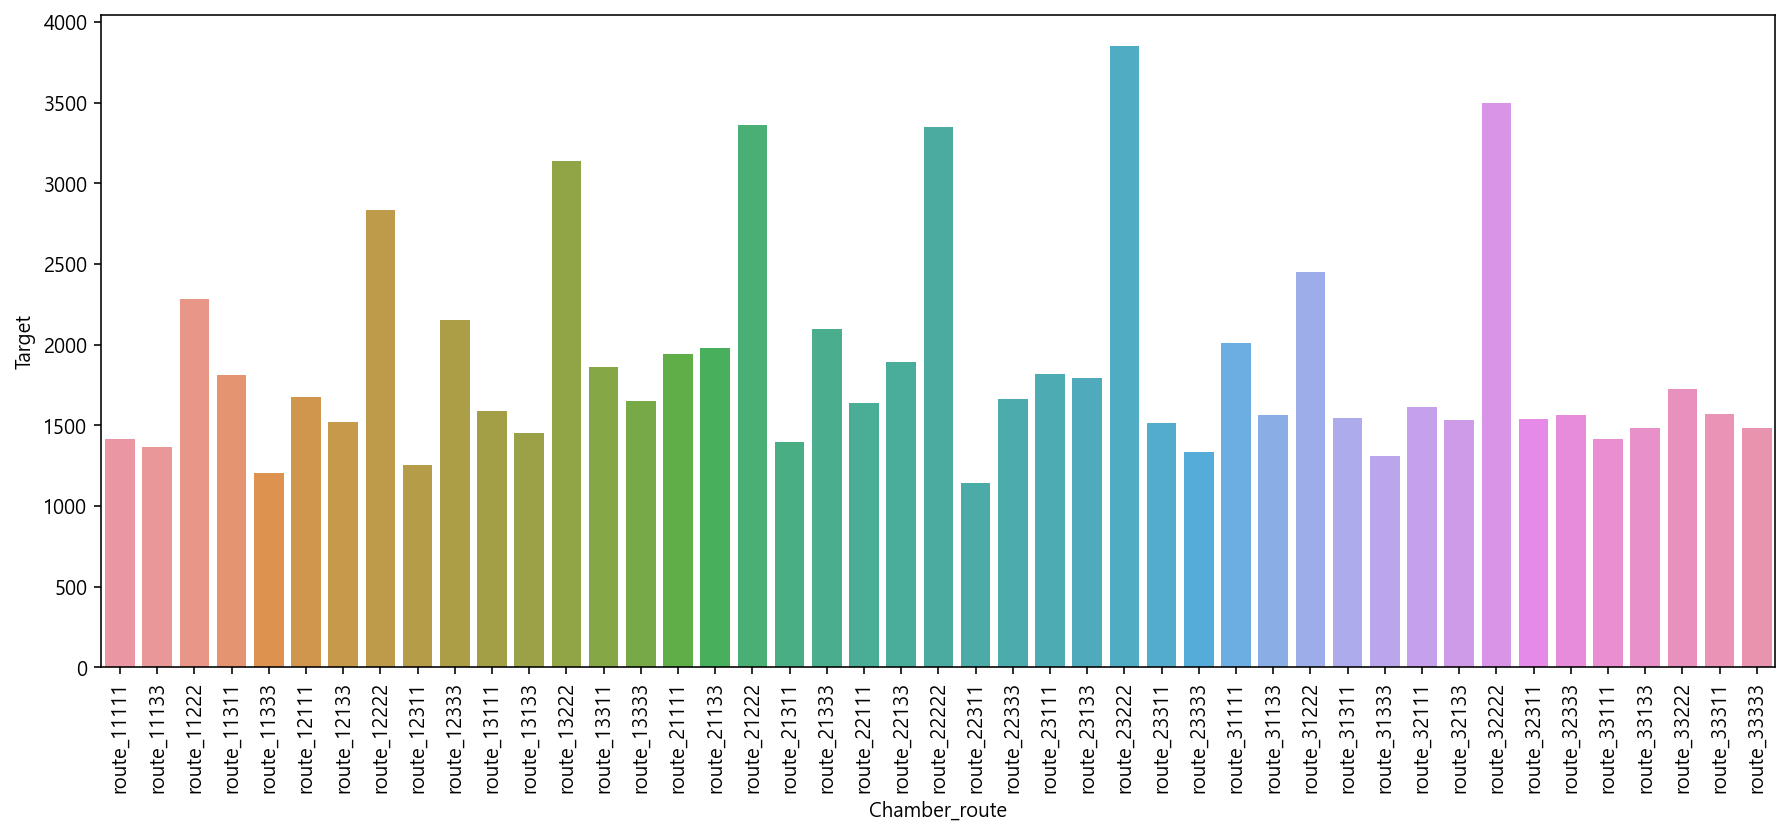

In [68]:
plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.barplot(data = Chamber_route_error , x = 'Chamber_route', y = 'Target')
plt.show()

## 2-5. 공정 경로 별 wafer 수 대비 내 불량비율(과부하) 계산 및 시각화 (Pivoting)

In [69]:
Chamber_route_Table = pd.merge(Chamber_route_count, Chamber_route_error, on = 'Chamber_route')
Chamber_route_Table.sort_values(by = 'Target', ascending = False)
Chamber_route_Table['Error_rate'] = (Chamber_route_Table['Target']) / (Chamber_route_Table['count'] * 200)

Chamber_route_Table.sort_values(by = 'Error_rate', ascending = False, ignore_index = True).head(5)

,Chamber_route,count,Target,Error_rate
0,route_32333,8,1561,0.975625
1,route_23133,11,1792,0.814545
2,route_13133,9,1452,0.806667
3,route_22133,12,1895,0.789583
4,route_12222,20,2835,0.708750


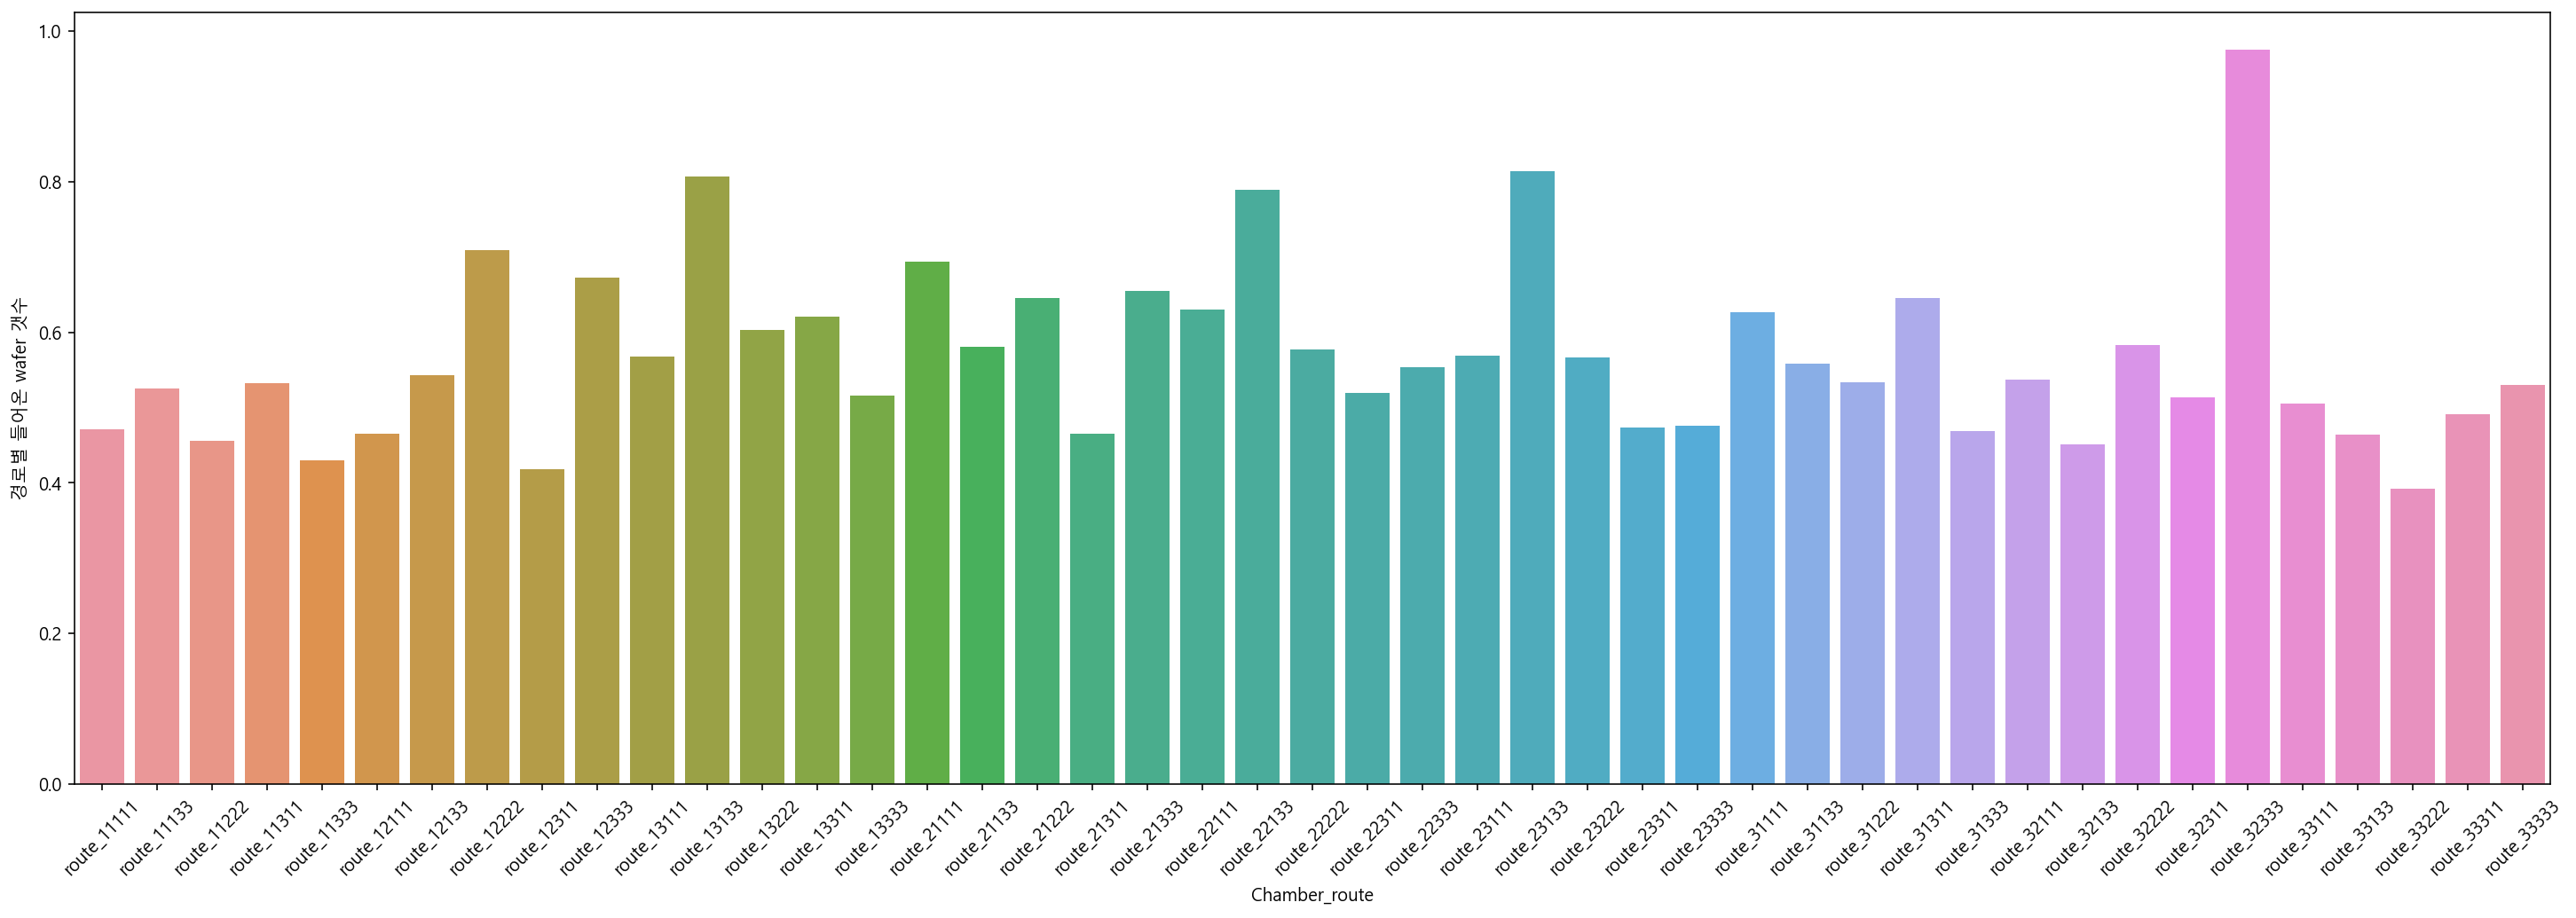

In [70]:
plt.figure(figsize = (25 , 8))
sns.barplot(data = Chamber_route_Table, x = 'Chamber_route',y = 'Error_rate')
plt.ylabel('경로별 들어온 wafer 갯수')
plt.xticks(rotation = 45)
plt.show()

### 공정 경로 별 Wafer 수 대비 내 불량비율이 60%를 넘어가는 경로에 대해 과부하 여부 Column 생성
- 과부하 여부 데이터를 전체 데이터와 병합
- Count plt을 이용한 데이터 시각화

In [71]:
Chamber_route_Table.head(5)

,Chamber_route,count,Target,Error_rate
0,route_11111,15,1415,0.471667
1,route_11133,13,1367,0.525769
2,route_11222,25,2281,0.456200
3,route_11311,17,1811,0.532647
4,route_11333,14,1203,0.429643


In [72]:
Chamber_route_Table['과부하여부'] = np.where(Chamber_route_Table['Error_rate'] > 0.60 , '과부하', '정상')

In [73]:
Chamber_route_Table.head(5)
Chamber_route_Table['과부하여부'].value_counts()

정상     31
과부하    14
Name: 과부하여부, dtype: int64

## 2-6. 전체 모든 공정 웨이퍼에 대해 과부하 루트와 정상 루트를 탄 Wafer 빈도수 시각화

- df3 = df3.loc[:,~df3.columns.duplicated()] 

In [74]:
# 각 wafer에 부하/정상 경로를 탔는지 시각화
df4 = df3.merge(Chamber_route_Table, on = "Chamber_route", how = "left")
print(df4.shape)
df4.head(2)

(752, 61)


,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Reinforcement,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Range_check,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching_rate,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target_x,Error_message,target_binom,Chamber_route,count,Target_y,Error_rate,과부하여부
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62.0,699.443,NOLSM111,False,1,Photo,1.21194,13.891,15.025,20.000,198.792,90.001,504.589,4082.622,5184.620,5.044,90.894,30.009,1,30.959,H,405,516.657,109.769,True,3,Etching,70.878,50.851,1.047,251.0,267.06,303.82,361.38,3.679333,3,Implantation,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,102.847,885.0,154,96,none,0,route_11133,13,1367,0.525769,정상
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137.0,696.792,NOLSM212,False,1,Photo,0.88772,14.722,15.059,19.995,198.747,89.998,492.196,3960.739,5065.197,5.058,92.334,29.997,2,29.653,H,405,501.894,107.102,True,2,Etching,69.561,52.283,1.051,317.0,332.74,369.31,426.11,3.637000,2,Implantation,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,104.323,919.0,154,102,none,0,route_11222,25,2281,0.456200,정상


In [75]:
df4.shape

(752, 61)

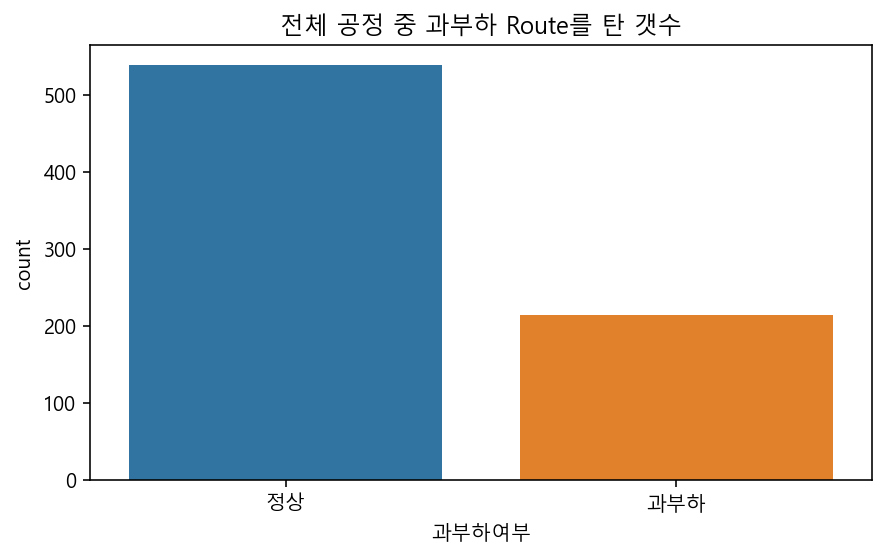

In [76]:
plt.figure(figsize = (7 , 4))
sns.countplot(data = df4, x = '과부하여부')
plt.title('전체 공정 중 과부하 Route를 탄 갯수')
plt.show()

## 2-7. 공정 주요 인자들에 대한 부하여부에 따른 분포 확인
- Thickness / Resist Target / Etching Rate 값의 histogram 확인

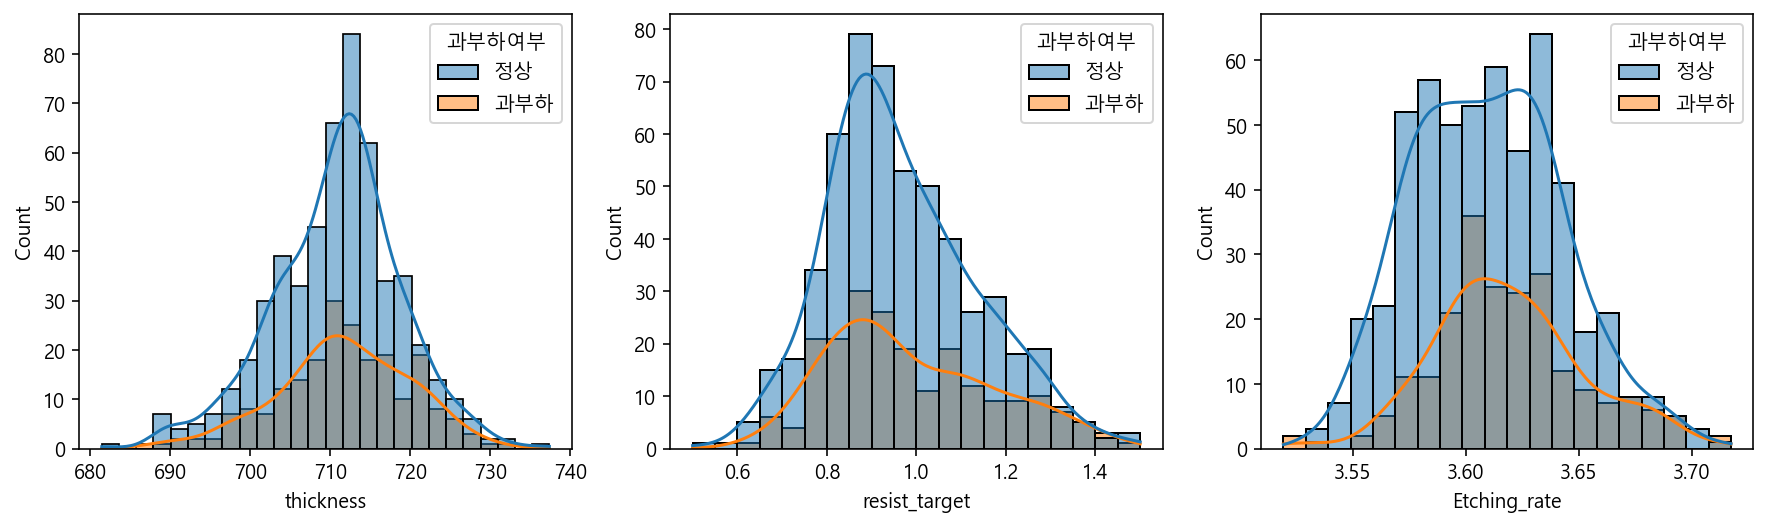

In [77]:
figure, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1)
figure.set_size_inches(15, 4)
sns.histplot(df4, x = 'thickness', hue = '과부하여부', kde = True, ax = ax1)
sns.histplot(df4, x = 'resist_target', hue = '과부하여부', kde = True, ax = ax2)
sns.histplot(df4, x = 'Etching_rate', hue = '과부하여부', kde = True, ax = ax3)

plt.show()

## 2-8. 모든 공정 인자들에 대한 부하여부에 따른 분포를 확인

In [78]:
total_ls = list(df4.columns)

In [79]:
df_all_numeric = df4[['ppm', 'Pressure', 'Oxid_time', 'thickness', 'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake',
                      'time_HMDS_bake',  '과부하여부']]
df_all_numeric_2 = df4[[ 'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake', 'time_softbake', 'Line_CD', 'Resolution', '과부하여부'
                     ]]
df_all_numeric_3 = df4[[ 'Energy_Exposure', 'Temp_Etching', 'Source_Power', 'Selectivity', 'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
                      'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp', 'Target_x', 'Error_rate', '과부하여부']]


In [80]:
#sns.pairplot(df_all_numeric, hue = '과부하여부')

## 2-9. 각 Chamber route 별 불량 개수의 유의미한 차이가 있는지 검정 (Chi Square Test)
- 귀무가설 / 대립가설 수립
- P.value 계산 및 결론 도출(Chi Square Test 실시)

- 귀무가설 : Chamber route에 따라서 불량 개수가 유의미한 차이를 가질 것이다.
- 대립가설 : Chamber route에 따라서 불량 개수가 차이를 가지지 않을 것이다

In [81]:

die_count = df4[['Chamber_route', 'Target_y', 'count']]
die_count['Normal_Die'] = (die_count['count'] * 200) - die_count['Target_y']
die_count.rename(columns = {'Target_y' : 'Target_Die'}, inplace= True)
die_count.drop(columns = 'count', inplace = True)

die_count.head()
die_count_test = die_count.pivot_table(index = 'Chamber_route', values = ['Target_Die', 'Normal_Die'])

In [82]:
chi, pval, dof, expected = stats.chi2_contingency(die_count_test)

print("chi-square test")
print('chisq {0:0.3f}'.format(chi))
print('p: {0:0.25f}'.format(pval))
print("degree pf freedom : {}".format(dof))
print("expected value: \n {}".format(expected.round(3)))

chi-square test
chisq 6224.720
p: 0.0000000000000000000000000
degree pf freedom : 44
expected value: 
 [[1318.943 1681.057]
 [1143.084 1456.916]
 [2198.238 2801.762]
 [1494.802 1905.198]
 [1231.013 1568.987]
 [1582.731 2017.269]
 [1231.013 1568.987]
 [1758.59  2241.41 ]
 [1318.943 1681.057]
 [1406.872 1793.128]
 [1231.013 1568.987]
 [ 791.366 1008.634]
 [2286.168 2913.832]
 [1318.943 1681.057]
 [1406.872 1793.128]
 [1231.013 1568.987]
 [1494.802 1905.198]
 [2286.168 2913.832]
 [1318.943 1681.057]
 [1406.872 1793.128]
 [1143.084 1456.916]
 [1055.154 1344.846]
 [2549.956 3250.044]
 [ 967.225 1232.775]
 [1318.943 1681.057]
 [1406.872 1793.128]
 [ 967.225 1232.775]
 [2989.604 3810.396]
 [1406.872 1793.128]
 [1231.013 1568.987]
 [1406.872 1793.128]
 [1231.013 1568.987]
 [2022.379 2577.621]
 [1055.154 1344.846]
 [1231.013 1568.987]
 [1318.943 1681.057]
 [1494.802 1905.198]
 [2637.886 3362.114]
 [1318.943 1681.057]
 [ 703.436  896.564]
 [1231.013 1568.987]
 [1406.872 1793.128]
 [1934.449 2465

In [83]:
# 결론 , 카이제곱 검정 결과 , p-value가 < 0,05이므로 귀무가설을 기각한다. 즉
# 챔버루트에 따라서 불량개수가 유의미한 차이를 가지지 않을 것이다.

In [84]:
# 종합적 결론 : etching rate와 target의 correlation은 양의 상관관계를 갖는다. 즉 강한 연관이 있을거라 예측
# oxid_time은 reinforcemet 여부에 따라서  유의미한 차이를 갖는다.
# UV type에 따라서 Out of range 비율은 서로 다르게 나타난다.
# 각 챔버루트별 불량 개수는 유의미한 차이를 가지지 않는다.

# 3. 데이터 모델링

## 3-1. 품질 검사의 Error 유무에 따른 분류모델을 생성

- Decision Tree
- Random Forest
- Gradient Boosting

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 회귀분석
from statsmodels.formula.api import ols # 회귀분석 모델 생성
from statsmodels.api import qqplot, add_constant # 잔차항 분석, 상수항
import statsmodels.formula.api as smf # 선형 모델 생성
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score # 결정계수 평가지표
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공산성
from sklearn.metrics import confusion_matrix

In [86]:
ls_drop = ['Ox_Chamber', 'process', 'type', 'Vapor', 'No_Die', 'Reinforcement', 'photo_soft_Chamber',
'process 2', 'lithography_Chamber', 'UV_type', 'Range_check', 'Etching_Chamber', 'Process 3',
'Chamber_Num', 'process4', 'Error_message', 'target_binom', '과부하여부', 'Chamber_route', 'Target_x', 'Target_y']

In [87]:
df4.head(5)

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Reinforcement,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Range_check,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching_rate,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target_x,Error_message,target_binom,Chamber_route,count,Target_y,Error_rate,과부하여부
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62.0,699.443,NOLSM111,False,1,Photo,1.211940,13.891,15.025,20.000,198.792,90.001,504.589,4082.622,5184.620,5.044,90.894,30.009,1,30.959,H,405,516.657,109.769,True,3,Etching,70.878,50.851,1.047,251.0,267.06,303.82,361.38,3.679333,3,Implantation,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,102.847,885.0,154,96,none,0,route_11133,13,1367,0.525769,정상
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137.0,696.792,NOLSM212,False,1,Photo,0.887720,14.722,15.059,19.995,198.747,89.998,492.196,3960.739,5065.197,5.058,92.334,29.997,2,29.653,H,405,501.894,107.102,True,2,Etching,69.561,52.283,1.051,317.0,332.74,369.31,426.11,3.637000,2,Implantation,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,104.323,919.0,154,102,none,0,route_11222,25,2281,0.456200,정상
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128.0,705.471,NOLSM313,True,1,Photo,1.113156,19.205,14.964,19.997,202.139,90.000,499.886,3981.691,4873.417,5.151,91.868,30.005,3,28.063,I,365,506.750,110.471,True,1,Etching,70.968,51.610,1.017,411.0,424.21,460.65,517.80,3.560000,1,Implantation,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17,32162.414,100.605,916.0,155,95,none,0,route_11311,17,1811,0.532647,정상
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90.0,710.772,NOLSM414,True,2,Photo,0.882195,16.368,14.944,19.998,199.649,90.001,505.249,3922.191,5131.972,5.069,91.881,29.997,1,31.556,I,365,537.603,107.072,True,1,Etching,70.146,51.286,1.027,256.0,272.28,308.56,365.93,3.664333,1,Implantation,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17,32874.925,101.739,911.0,156,117,none,0,route_12111,18,1677,0.465833,정상
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98.0,716.975,NOLSM515,True,2,Photo,0.834001,13.926,14.933,20.002,204.544,90.001,501.089,4124.099,5108.355,5.055,91.212,30.001,2,31.969,I,365,560.574,108.073,True,2,Etching,71.174,51.996,1.050,419.0,434.98,471.65,528.85,3.661667,2,Implantation,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17,30985.928,106.422,872.0,155,143,none,0,route_12222,20,2835,0.708750,과부하


In [88]:
y = df4['target_binom'] #불량 유무
X = df4.drop(columns = ls_drop)

In [89]:
## 회귀 모델 생성 : 설명변수 전체

In [90]:
print(X.shape, y.shape)

(752, 40) (752,)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(564, 40)
(188, 40)
(564,)
(188,)


In [93]:
## shift - alt 방향키 - 한줄 복사가능

## 3-2. Decision Tree를 이용한 모델링

In [108]:
clf_grid = GridSearchCV(DecisionTreeClassifier(), n_jobs=-1,
            param_grid={'class_weight': [None, 'balanced'],
                            'criterion':['gini', 'entropy'],
                            'max_depth': [2,3,4,5,6,7],
                            'min_samples_leaf': [3,4,5,6,7],
                            'min_samples_split': [4,5,6,7,8]},
            scoring='f1')

In [109]:
grid_result =clf_grid.fit(X_train, y_train)

In [110]:
print(grid_result.best_params_)
print(grid_result.best_score_)
grid_result.best_estimator_

{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.5269568151147099


DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=8)

In [111]:
## grid _result의 결과로 의사 결정 트리를 사용. 베스트 모델 생성
best_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=  4, min_samples_split = 6)

In [112]:
print(best_model)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=6)


In [113]:
best_model.fit(X_train, y_train) # 베스트 모델 기반으로 가중치 학습

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=6)

In [114]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [115]:
print(y_train_pred.shape)
y_test_pred.shape

(564,)


(188,)

In [116]:
score = accuracy_score(y_test, y_test_pred)

In [117]:
conf_mat = confusion_matrix(y_test, y_test_pred)

print(score, '\n',conf_mat)

0.9414893617021277 
 [[165   3]
 [  8  12]]


In [118]:
print(classification_report(y_train,  y_train_pred))
print("\n")
print(classification_report(y_test,  y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       520
           1       0.89      0.73      0.80        44

    accuracy                           0.97       564
   macro avg       0.93      0.86      0.89       564
weighted avg       0.97      0.97      0.97       564



              precision    recall  f1-score   support

           0       0.95      0.98      0.97       168
           1       0.80      0.60      0.69        20

    accuracy                           0.94       188
   macro avg       0.88      0.79      0.83       188
weighted avg       0.94      0.94      0.94       188



## 3-3. Gradient Boost(GBM)를 이용한 모델링

In [119]:
clf_grid = GridSearchCV(GradientBoostingClassifier(), n_jobs=-1,
            param_grid={
                            'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
                           'learning_rate': [0.1, 0.01, 0.001],
                            'n_estimators' : [50, 100, 150],
                            'max_depth' : [2,3,4,5,6]
            } )

In [120]:
clf_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150]})

In [121]:
clf_grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [122]:
gbm = GradientBoostingClassifier(criterion  = 'mse', learning_rate = 0.1, max_depth = 2, n_estimators = 150)

In [123]:
gbm_result = gbm.fit(X_train, y_train)

In [124]:
y_train_pred = gbm_result.predict(X_train)
y_test_pred = gbm_result.predict(X_test)

In [125]:
accuracy_score(y_train, y_train_pred)

1.0

In [126]:
conf_mat = confusion_matrix(y_test, y_test_pred)
print(score, '\n',conf_mat)

0.9414893617021277 
 [[166   2]
 [ 11   9]]


In [127]:
print(classification_report(y_train,  y_train_pred))
print("\n")
print(classification_report(y_test,  y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00        44

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



              precision    recall  f1-score   support

           0       0.94      0.99      0.96       168
           1       0.82      0.45      0.58        20

    accuracy                           0.93       188
   macro avg       0.88      0.72      0.77       188
weighted avg       0.93      0.93      0.92       188



In [128]:
X.head()

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,Line_CD,Wavelength,Resolution,Energy_Exposure,Temp_Etching,Source_Power,Selectivity,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching_rate,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,count,Error_rate
0,1138.979159,32.80,0.200,62.0,699.443,1.211940,13.891,15.025,20.000,198.792,90.001,504.589,4082.622,5184.620,5.044,90.894,30.009,30.959,405,516.657,109.769,70.878,50.851,1.047,251.0,267.06,303.82,361.38,3.679333,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,102.847,885.0,154,13,0.525769
1,1218.184551,31.86,0.194,137.0,696.792,0.887720,14.722,15.059,19.995,198.747,89.998,492.196,3960.739,5065.197,5.058,92.334,29.997,29.653,405,501.894,107.102,69.561,52.283,1.051,317.0,332.74,369.31,426.11,3.637000,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,104.323,919.0,154,25,0.456200
2,1062.467808,39.51,0.217,128.0,705.471,1.113156,19.205,14.964,19.997,202.139,90.000,499.886,3981.691,4873.417,5.151,91.868,30.005,28.063,365,506.750,110.471,70.968,51.610,1.017,411.0,424.21,460.65,517.80,3.560000,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17,32162.414,100.605,916.0,155,17,0.532647
3,1114.704773,32.88,0.201,90.0,710.772,0.882195,16.368,14.944,19.998,199.649,90.001,505.249,3922.191,5131.972,5.069,91.881,29.997,31.556,365,537.603,107.072,70.146,51.286,1.027,256.0,272.28,308.56,365.93,3.664333,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17,32874.925,101.739,911.0,156,18,0.465833
4,989.411946,38.11,0.204,98.0,716.975,0.834001,13.926,14.933,20.002,204.544,90.001,501.089,4124.099,5108.355,5.055,91.212,30.001,31.969,365,560.574,108.073,71.174,51.996,1.050,419.0,434.98,471.65,528.85,3.661667,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17,30985.928,106.422,872.0,155,20,0.708750


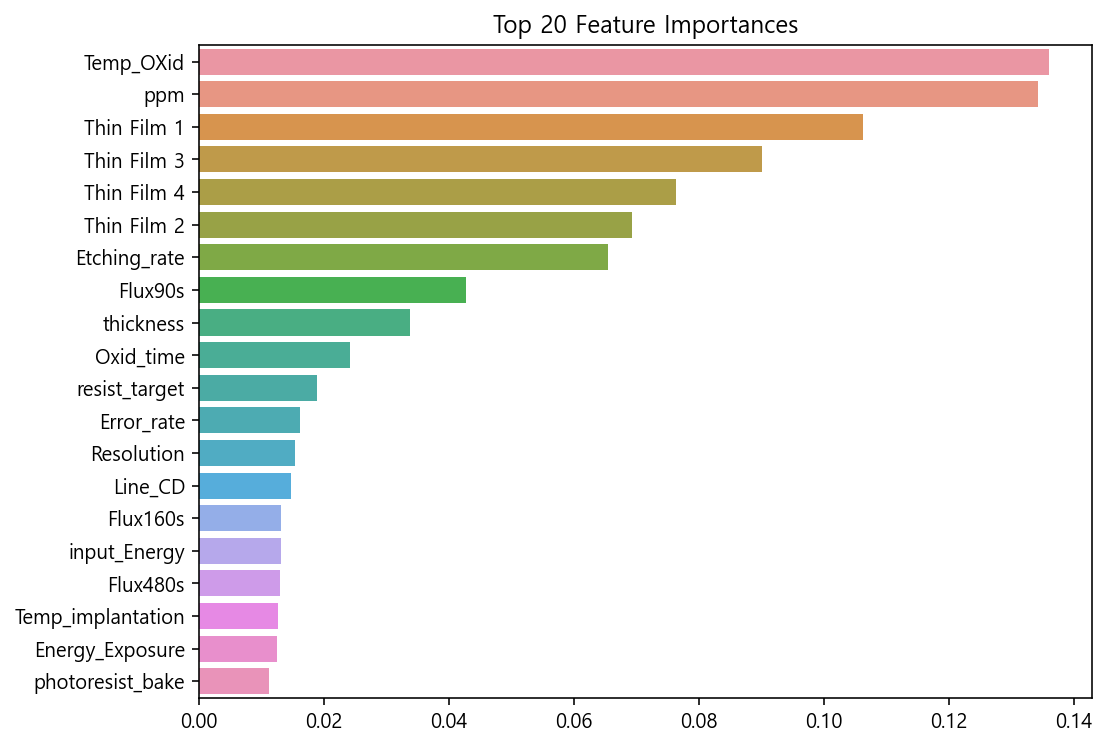

In [129]:
ftr_importances_values = gbm_result.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 3-4. Random Forest를 이용한 모델링

In [130]:
rf_clf1 = RandomForestClassifier(random_state=0)

In [131]:
rfm_result = rf_clf1.fit(X_train, y_train)

In [132]:
y_train_pred = rfm_result.predict(X_train)
y_test_pred = rfm_result.predict(X_test)

In [133]:
conf_mat = confusion_matrix(y_test, y_test_pred)
print(score, '\n',conf_mat)

0.9414893617021277 
 [[166   2]
 [ 10  10]]


In [134]:
print(classification_report(y_train,  y_train_pred))
print("\n")
print(classification_report(y_test,  y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00        44

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



              precision    recall  f1-score   support

           0       0.94      0.99      0.97       168
           1       0.83      0.50      0.62        20

    accuracy                           0.94       188
   macro avg       0.89      0.74      0.80       188
weighted avg       0.93      0.94      0.93       188



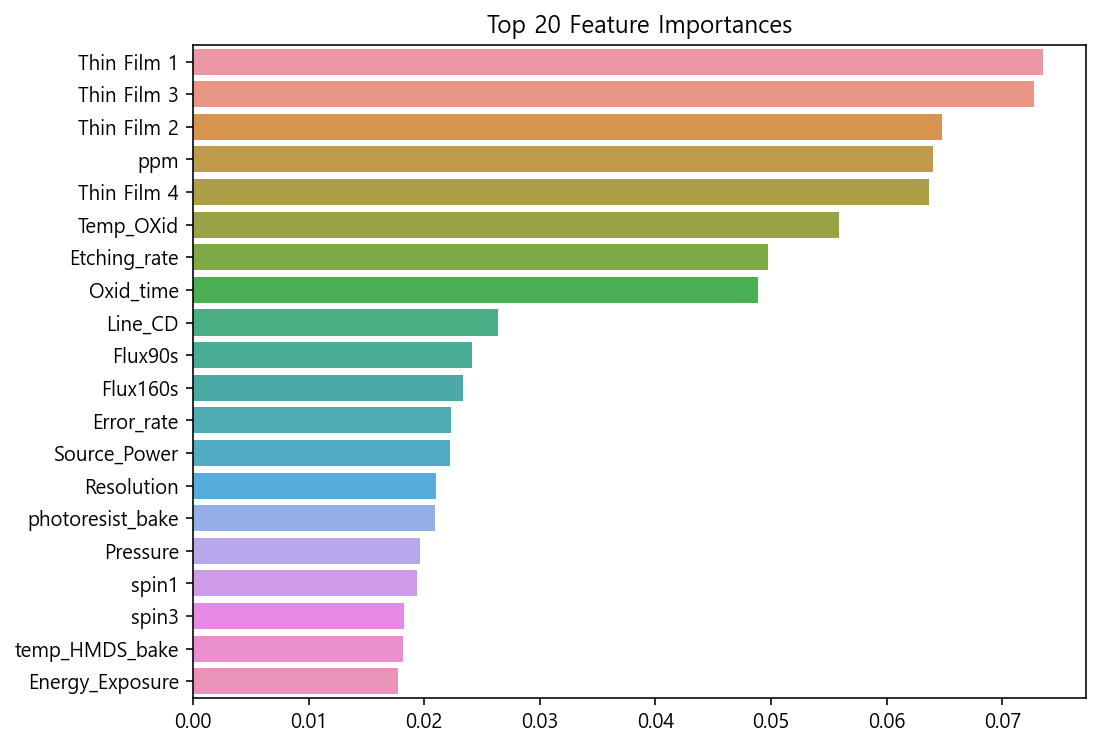

In [135]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

- 어떤 모델이 가장 성능이 좋은가? acuuracy 정확도는 0.97로 gradient boosting 학습모델이 결과가 가장 좋았다.
- 가장 학습이 느린 모델은 무엇이며, 그 이유는 무엇인가? 가장 학습이 느린 모델은 gradient boosting모델로, 오차를 바탕으로 작아지는 방향으로 지속적으로 반복하여 데이터를 계산하기 때문이다.
- 일반화(검증데이터)에 대한 성능을 높이려면 어떻게 해야하는가? 단일 모델을 사용하는 것이 아닌, 앙상블 방법론을 사용해 결합 모형을 사용한다(Boosting 모델)

In [136]:
4

4